In [1]:
import pandas as pd
import requests,json
import folium
from urllib.parse import quote      # 한글 인코딩

In [2]:
with open('data/roadapikey.txt') as f:
    road_key = f.read()

In [3]:
uni_list = '아주대학교,동남보건대학,수원 경기대학교,수원 성균관대학교,수원여자대학해란캠퍼스,용인 경희대학교,수원대학교,수원과학대학'.split(',')
uni_list

['아주대학교',
 '동남보건대학',
 '수원 경기대학교',
 '수원 성균관대학교',
 '수원여자대학해란캠퍼스',
 '용인 경희대학교',
 '수원대학교',
 '수원과학대학']

In [4]:
base_url = 'https://www.juso.go.kr/addrlink/addrLinkApiJsonp.do'
params1 = f'confmKey={road_key}&currentPage=1&countPerPage=10'
params2 = f"keyword={quote('')}&resultType=json"
url = f'{base_url}?{params1}&{params2}'

In [5]:
road_addr_list = []
for uni in uni_list:
    params2 = f"keyword={quote(uni)}&resultType=json"
    url = f'{base_url}?{params1}&{params2}'
    result = requests.get(url)
    if result.status_code == 200:
        res = json.loads(result.text[1:-1])
        road_addr_list.append(res['results']['juso'][0]['roadAddr'])
    else:
        print(result.status_code)

In [6]:
df = pd.DataFrame({
    '이름':list(map(lambda x:x.split()[-1],uni_list)),'주소':road_addr_list
})
df

,이름,주소
0,아주대학교,경기도 수원시 영통구 월드컵로 199 (원천동)
1,동남보건대학,경기도 수원시 장안구 천천로74번길 50 (정자동)
2,경기대학교,경기도 수원시 영통구 광교산로 154-42 (이의동)
3,성균관대학교,경기도 수원시 장안구 서부로 2066 (천천동)
4,수원여자대학해란캠퍼스,경기도 화성시 봉담읍 주석로 1098
5,경희대학교,경기도 용인시 기흥구 덕영대로 1732 (서천동)
6,수원대학교,경기도 화성시 봉담읍 와우안길 17
7,수원과학대학,경기도 화성시 정남면 세자로 288


In [7]:
with open('data/kakaoapikey.txt') as f_:
    kakao_key = f_.read()

In [8]:
base_url = "https://dapi.kakao.com/v2/local/search/address.json"
url = f'{base_url}?query={quote("")}'
header = {'Authorization':f'KakaoAK {kakao_key}'}


In [9]:
lat_list = []
lng_list = []
for i in df.index:
    url = f'{base_url}?query={quote(df.주소[i])}'
    result = requests.get(url, headers=header).json()
    lat_list.append(float(result['documents'][0]['y']))
    lng_list.append(float(result['documents'][0]['x']))
df['위도'] = lat_list
df['경도'] = lng_list
df

,이름,주소,위도,경도
0,아주대학교,경기도 수원시 영통구 월드컵로 199 (원천동),37.279205,127.044142
1,동남보건대학,경기도 수원시 장안구 천천로74번길 50 (정자동),37.296938,126.987000
2,경기대학교,경기도 수원시 영통구 광교산로 154-42 (이의동),37.298014,127.033117
3,성균관대학교,경기도 수원시 장안구 서부로 2066 (천천동),37.295976,126.974209
4,수원여자대학해란캠퍼스,경기도 화성시 봉담읍 주석로 1098,37.202097,126.931445
5,경희대학교,경기도 용인시 기흥구 덕영대로 1732 (서천동),37.239800,127.081199
6,수원대학교,경기도 화성시 봉담읍 와우안길 17,37.210117,126.979480
7,수원과학대학,경기도 화성시 정남면 세자로 288,37.192033,126.983927


In [10]:
df['color'] = ['red','green','blue','orange','darkred','darkblue','violet','black']
df

,이름,주소,위도,경도,color
0,아주대학교,경기도 수원시 영통구 월드컵로 199 (원천동),37.279205,127.044142,red
1,동남보건대학,경기도 수원시 장안구 천천로74번길 50 (정자동),37.296938,126.987000,green
2,경기대학교,경기도 수원시 영통구 광교산로 154-42 (이의동),37.298014,127.033117,blue
3,성균관대학교,경기도 수원시 장안구 서부로 2066 (천천동),37.295976,126.974209,orange
4,수원여자대학해란캠퍼스,경기도 화성시 봉담읍 주석로 1098,37.202097,126.931445,darkred
5,경희대학교,경기도 용인시 기흥구 덕영대로 1732 (서천동),37.239800,127.081199,darkblue
6,수원대학교,경기도 화성시 봉담읍 와우안길 17,37.210117,126.979480,violet
7,수원과학대학,경기도 화성시 정남면 세자로 288,37.192033,126.983927,black


In [11]:
map = folium.Map(location=[df.위도.mean(),df.경도.mean()],zoom_start=12)
for i in df.index:
    folium.Circle(
    location=[df.위도[i], df.경도[i]],                     
    popup=folium.Popup(df.주소[i],max_width=200),
    tooltip=df.이름[i],
    radius=300,color=df.color[i],fill=True
).add_to(map)
title_html = '<h3 align="center" style="font-size:20px">수원 소재 대학교</h3>'
map.get_root().html.add_child(folium.Element(title_html))
map

In [12]:
df.to_csv('data/수원소재대학교.csv',index=False)
pd.read_csv('data/수원소재대학교.csv')

,이름,주소,위도,경도,color
0,아주대학교,경기도 수원시 영통구 월드컵로 199 (원천동),37.279205,127.044142,red
1,동남보건대학,경기도 수원시 장안구 천천로74번길 50 (정자동),37.296938,126.987000,green
2,경기대학교,경기도 수원시 영통구 광교산로 154-42 (이의동),37.298014,127.033117,blue
3,성균관대학교,경기도 수원시 장안구 서부로 2066 (천천동),37.295976,126.974209,orange
4,수원여자대학해란캠퍼스,경기도 화성시 봉담읍 주석로 1098,37.202097,126.931445,darkred
5,경희대학교,경기도 용인시 기흥구 덕영대로 1732 (서천동),37.239800,127.081199,darkblue
6,수원대학교,경기도 화성시 봉담읍 와우안길 17,37.210117,126.979480,violet
7,수원과학대학,경기도 화성시 정남면 세자로 288,37.192033,126.983927,black



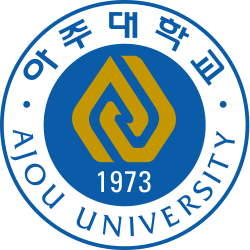
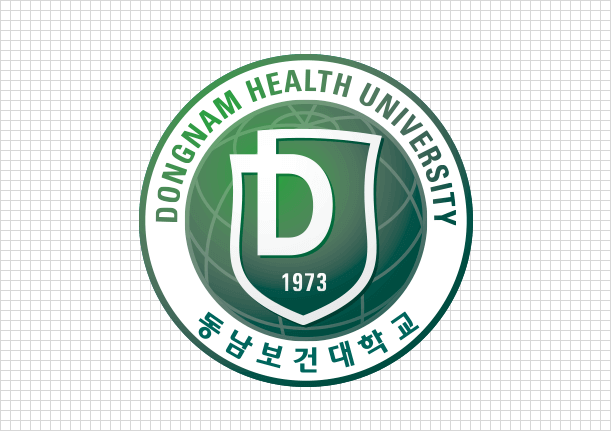
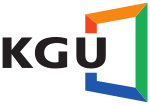
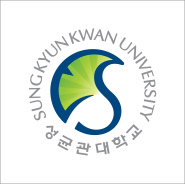
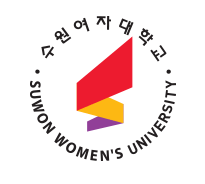
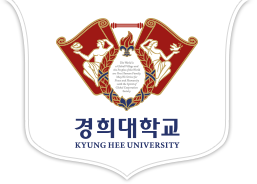
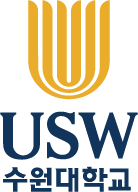
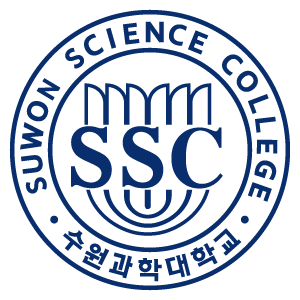

In [13]:
map = folium.Map(location=[df.위도.mean(),df.경도.mean()],zoom_start=12)
for i in df.index:
    pushpin = folium.CustomIcon(f'data/logo/{df.이름[i]}.png', icon_size=(40,40))
    folium.Marker(
        location=[df.위도[i], df.경도[i]],                     
        popup=folium.Popup(df.주소[i],max_width=200),
        tooltip=df.이름[i],
        icon=pushpin
    ).add_to(map)
title_html = '<h3 align="center" style="font-size:20px">수원 소재 대학교</h3>'
map.get_root().html.add_child(folium.Element(title_html))
map